In [49]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [50]:
url = 'https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/stackloss/stackloss.csv'
df = pd.read_csv(url)
df

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87
5,18,62,23,87
6,19,62,24,93
7,20,62,24,93
8,15,58,23,87
9,14,58,18,80


In [51]:
df.columns

Index(['STACKLOSS', 'AIRFLOW', 'WATERTEMP', 'ACIDCONC'], dtype='object')

In [52]:
df.describe()

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
count,21.000000,21.000000,21.000000,21.000000
mean,17.523810,60.428571,21.095238,86.285714
std,10.171623,9.168268,3.160771,5.358571
min,7.000000,50.000000,17.000000,72.000000
25%,11.000000,56.000000,18.000000,82.000000
50%,15.000000,58.000000,20.000000,87.000000
75%,19.000000,62.000000,24.000000,89.000000
max,42.000000,80.000000,27.000000,93.000000


In [71]:
for col in df.columns:
    df[col] = df[col].astype(dtype = 'float64')    

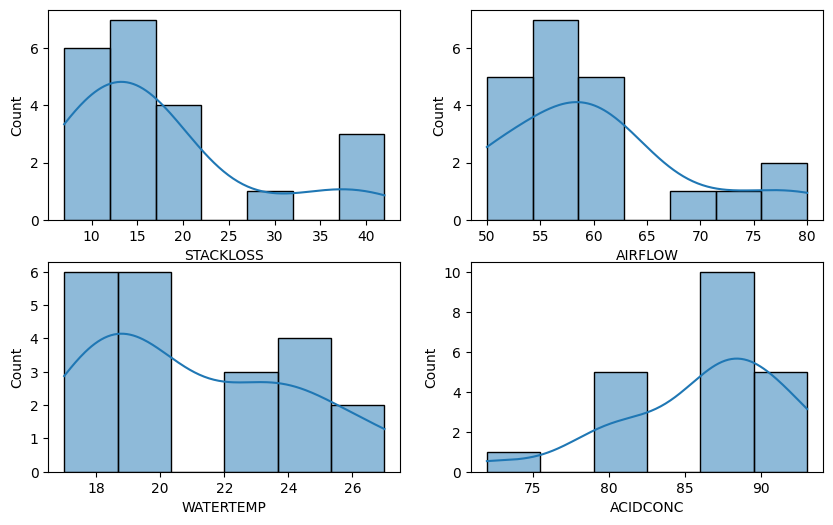

In [72]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x= col, kde=True, ax=ax[i])
plt.show()

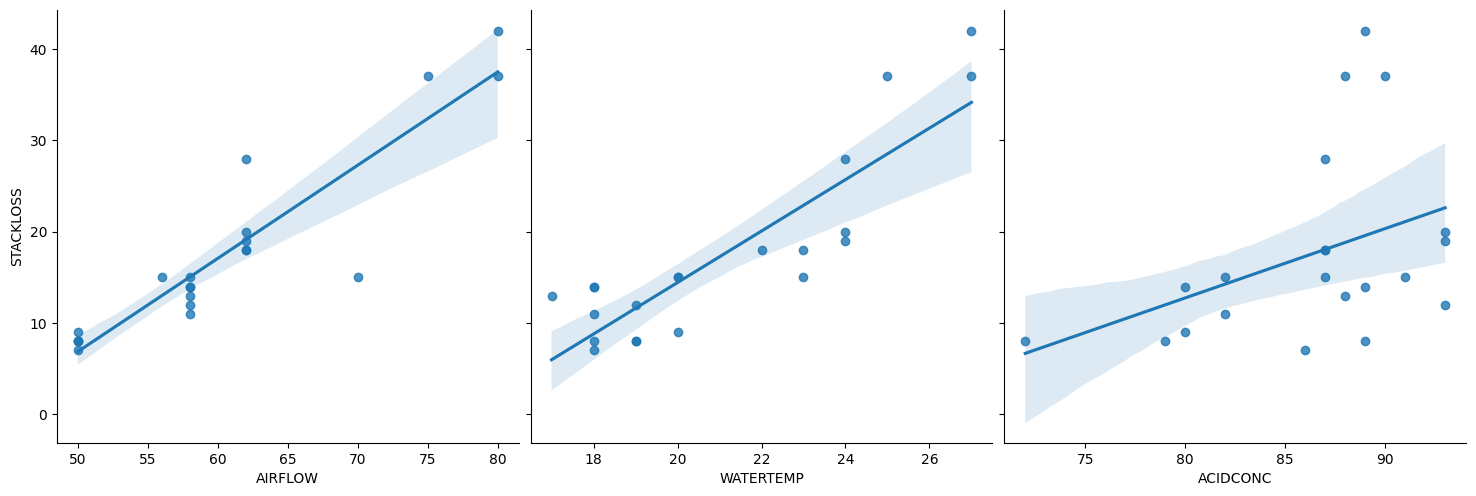

In [54]:
sns.pairplot(df,x_vars=['AIRFLOW', 'WATERTEMP', 'ACIDCONC'], y_vars='STACKLOSS', height=5, kind='reg')

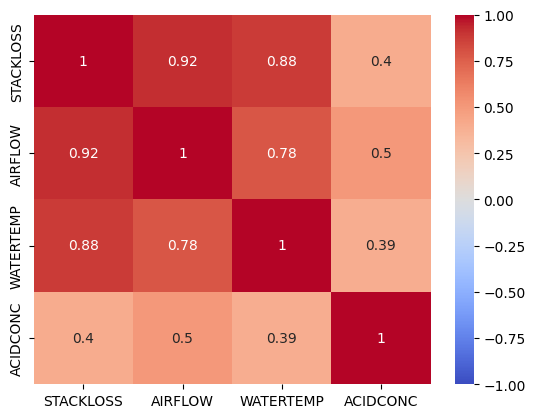

In [55]:
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True)
plt.show()

In [56]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [57]:
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
print(f'Coefficients, kulmakertoimet {reg.coef_}')
print(f'Interepet/vakotermi, y:n leikkauspiste {reg.intercept_}')

Coefficients, kulmakertoimet [ 0.7156402   1.29528612 -0.15212252]
Interepet/vakotermi, y:n leikkauspiste -39.91967442012404


In [59]:
y_pred = reg.predict(X)
y_pred

array([38.76536277, 38.91748529, 32.444467  , 22.30222583, 19.71165358,
       21.0069397 , 21.38949071, 21.38949071, 18.1443789 , 12.73280592,
       11.36370324, 10.22053964, 12.42856088, 12.05049929,  5.63858164,
        6.0949492 ,  9.51995059,  8.45509295,  9.59825656, 13.58785272,
       22.23771286])

In [60]:
rmse = root_mean_squared_error(y, y_pred)
r2s = r2_score(y, y_pred)
print(rmse)
print(r2s)

2.9181693674399174
0.913576904460682


In [61]:
y.shape, y_pred.shape

((21,), (21,))

In [62]:
df2 = pd.concat([y,pd.Series(y_pred), pd.Series(y-y_pred)], axis=1)
df2.columns = ['observed', 'predicted', 'residual']
df2

,observed,predicted,residual
0,42,38.765363,3.234637
1,37,38.917485,-1.917485
2,37,32.444467,4.555533
3,28,22.302226,5.697774
4,18,19.711654,-1.711654
5,18,21.006940,-3.006940
6,19,21.389491,-2.389491
7,20,21.389491,-1.389491
8,15,18.144379,-3.144379
9,14,12.732806,1.267194


In [63]:
df2['residual'].mean().round(2)

np.float64(-0.0)

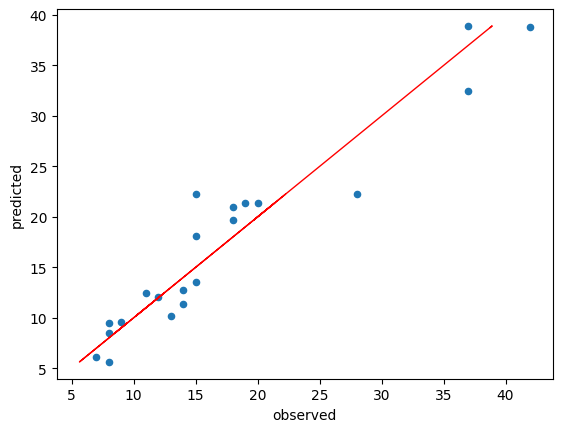

In [64]:
df2.plot.scatter(x='observed', y='predicted')
plt.plot(y_pred, y_pred, color='red', linewidth=1)
plt.show()

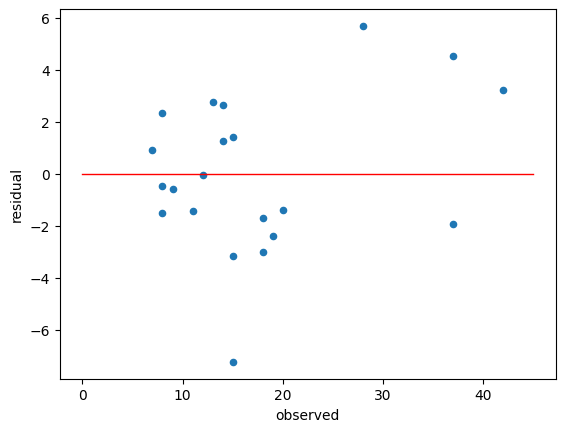

In [65]:
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,45],[0,0], color='red', linewidth=1)
plt.show()

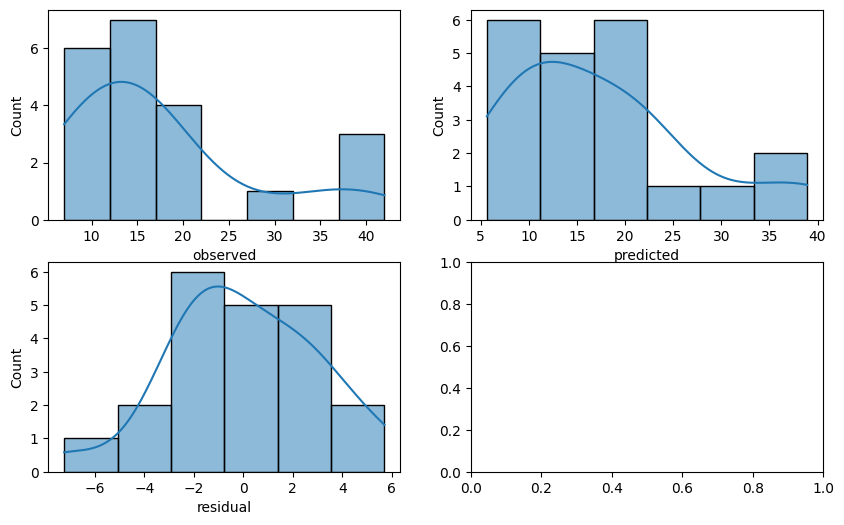

In [66]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
ax = ax.flatten()
for i, col in enumerate(df2.columns):
    sns.histplot(data=df2, x= col, kde=True, ax=ax[i])
plt.show()

In [67]:
scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df))
dfscaled.columns = ['STACKLOSS', 'AIRFLOW', 'WATERTEMP', 'ACIDCONC']
dfscaled

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,2.465745,2.187408,1.914273,0.519040
1,1.962043,2.187408,1.914273,0.327815
2,1.962043,1.628581,1.265890,0.710266
3,1.055377,0.175631,0.941699,0.136590
4,0.047972,0.175631,0.293316,0.136590
5,0.047972,0.175631,0.617508,0.136590
6,0.148712,0.175631,0.941699,1.283942
7,0.249453,0.175631,0.941699,1.283942
8,-0.254250,-0.271430,0.617508,0.136590
9,-0.354991,-0.271430,-1.003450,-1.201988


In [68]:
dfscaled.describe().round(2)

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
count,21.00,21.00,21.00,21.00
mean,-0.00,-0.00,0.00,-0.00
std,1.02,1.02,1.02,1.02
min,-1.06,-1.17,-1.33,-2.73
25%,-0.66,-0.49,-1.00,-0.82
50%,-0.25,-0.27,-0.36,0.14
75%,0.15,0.18,0.94,0.52
max,2.47,2.19,1.91,1.28


In [69]:
X_scaled = dfscaled.iloc[:, 1:]
y_scaled = dfscaled.iloc[:, 0]

X2 = sm.add_constant(X_scaled) # add intercept into X
est = sm.OLS(y_scaled, X2) # original Least Squares
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              STACKLOSS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     59.90
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.02e-09
Time:                        23:43:07   Log-Likelihood:                -4.0885
No. Observations:                  21   AIC:                             16.18
Df Residuals:                      17   BIC:                             20.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.901e-16      0.071  -2.67e-15      1.0